In [1]:
#Importing packages from pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD 
import bnlearn

In [2]:
 # Defining the model structure. We can define the network by just passing a list of edges
model = BayesianModel([('Buglary','Alarm'),('Earthquake','Alarm'),('Alarm','David'),('Alarm','Sophia')])

[bnlearn] >Plot based on BayesianModel


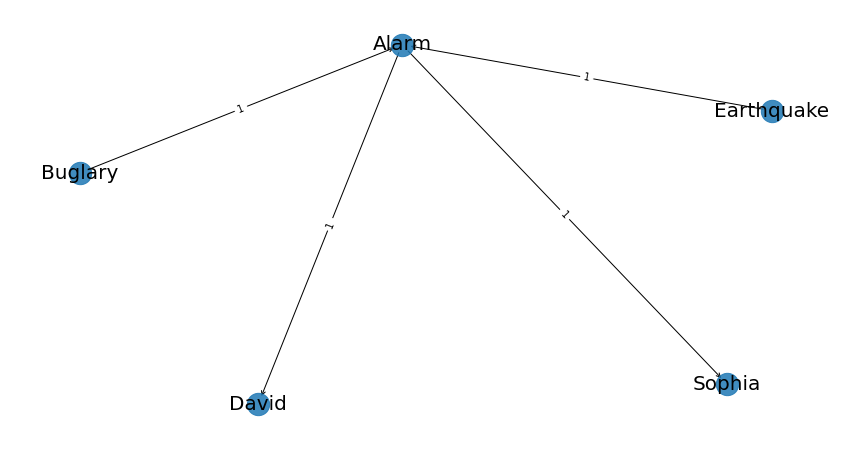

{'pos': {'Buglary': array([-1.        ,  0.25036127]),
  'Alarm': array([-0.12433885,  0.88639232]),
  'Earthquake': array([0.87997976, 0.55855919]),
  'David': array([-0.51506645, -0.89669737]),
  'Sophia': array([ 0.75942554, -0.79861541])},
 'G': <networkx.classes.digraph.DiGraph at 0x1ffaaba2a30>}

In [3]:
#graphically representing the buglary problem
bnlearn.plot(model)

In [4]:
# creating a tabular conditional probability for every features 
cpd_b = TabularCPD(variable='Buglary', variable_card=2, values=[[0.002], [0.998]])
cpd_e = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.001], [0.999]])
cpd_a = TabularCPD(variable='Alarm', variable_card=2, 
                    values=[[0.94,0.95,0.31, 0.001],
                            [0.06,0.05,0.69, 0.999]],
                   evidence=['Buglary', 'Earthquake'],
                   evidence_card=[2,2])
cpd_d= TabularCPD(variable='David', variable_card=2, 
                    values=[[0.91,0.05],
                            [0.09,0.95]],
                    evidence=['Alarm'],
                    evidence_card=[2])
cpd_s = TabularCPD(variable='Sophia', variable_card=2,
                    values=[[0.75, 0.02],
                            [0.25, 0.98]],
                    evidence=['Alarm'],
                    evidence_card=[2])

In [5]:
#adding relationship to the model
model.add_cpds(cpd_b,cpd_e,cpd_a,cpd_d,cpd_s)

In [6]:
#examine the structure of graph
model.get_cpds()

[<TabularCPD representing P(Buglary:2) at 0x1ffab279d90>,
 <TabularCPD representing P(Earthquake:2) at 0x1ffab279d30>,
 <TabularCPD representing P(Alarm:2 | Buglary:2, Earthquake:2) at 0x1ffab279e20>,
 <TabularCPD representing P(David:2 | Alarm:2) at 0x1ffab279d60>,
 <TabularCPD representing P(Sophia:2 | Alarm:2) at 0x1ffab279dc0>]

In [7]:
#finding active trails nodes basically depicting you the path 
model.active_trail_nodes('Buglary')

{'Buglary': {'Alarm', 'Buglary', 'David', 'Sophia'}}

In [8]:
#finding active nodes with earthquake
model.active_trail_nodes('Earthquake')

{'Earthquake': {'Alarm', 'David', 'Earthquake', 'Sophia'}}

In [9]:
# which feature is independent from buglary
model.local_independencies('Buglary')

(Buglary ⟂ Earthquake)

In [10]:
## which feature is independent from earthquake
model.local_independencies('Earthquake')

(Earthquake ⟂ Buglary)

In [11]:
# finding independent variable in model
model.get_independencies()

(Buglary ⟂ Earthquake)
(Buglary ⟂ David, Sophia | Alarm)
(Buglary ⟂ David, Sophia | Earthquake, Alarm)
(Buglary ⟂ Sophia | David, Alarm)
(Buglary ⟂ David | Sophia, Alarm)
(Buglary ⟂ Sophia | Earthquake, David, Alarm)
(Buglary ⟂ David | Earthquake, Sophia, Alarm)
(Earthquake ⟂ Buglary)
(Earthquake ⟂ David, Sophia | Alarm)
(Earthquake ⟂ Sophia | David, Alarm)
(Earthquake ⟂ David, Sophia | Buglary, Alarm)
(Earthquake ⟂ David | Sophia, Alarm)
(Earthquake ⟂ Sophia | David, Buglary, Alarm)
(Earthquake ⟂ David | Buglary, Sophia, Alarm)
(David ⟂ Earthquake, Buglary, Sophia | Alarm)
(David ⟂ Buglary, Sophia | Earthquake, Alarm)
(David ⟂ Earthquake, Sophia | Buglary, Alarm)
(David ⟂ Earthquake, Buglary | Sophia, Alarm)
(David ⟂ Sophia | Earthquake, Buglary, Alarm)
(David ⟂ Buglary | Earthquake, Sophia, Alarm)
(David ⟂ Earthquake | Buglary, Sophia, Alarm)
(Sophia ⟂ Earthquake, Buglary, David | Alarm)
(Sophia ⟂ David, Buglary | Earthquake, Alarm)
(Sophia ⟂ Earthquake, David | Buglary, Alarm)
(Soph

In [12]:
from pgmpy.inference import VariableElimination

In [13]:
infer=VariableElimination(model)

In [14]:
#probability distribution that are not explicity spelled out in our graphs
a_prob=infer.query(['Alarm'])
print(a_prob)

Eliminating: David: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 61.70it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.0032 |
+----------+--------------+
| Alarm(1) |       0.9968 |
+----------+--------------+


In [15]:
#conditional probability of ringing of alarm when buglary and earthquake is not occuring
print(infer.query(['Alarm'],evidence={'Buglary':0,'Earthquake':0}))


Finding Elimination Order: :   0%|                                                               | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Eliminating: David:   0%|                                                                        | 0/2 [00:00<?, ?it/s]

Eliminating: Sophia: 100%|██████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 105.55it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.9400 |
+----------+--------------+
| Alarm(1) |       0.0600 |
+----------+--------------+


In [16]:
#conditional probability of ringing of alarm when there is no buglary and earthquake but  still David and Sophia call harry
print(infer.query(['Alarm'], evidence={'Buglary':0,'Earthquake':0,'David':1,'Sophia':1}))



0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]


0it [00:00, ?it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.2746 |
+----------+--------------+
| Alarm(1) |       0.7254 |
+----------+--------------+


In [17]:
print(infer.query(['Alarm'], evidence={'Buglary':0,'Earthquake':1,'David':0,'Sophia':1}))




0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]



0it [00:00, ?it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.9888 |
+----------+--------------+
| Alarm(1) |       0.0112 |
+----------+--------------+
